# Cálculo Numérico - Zeros de Funções
## Fábio Melo e Thuane Mikaella


## Problema 1 - Profundidade de um Tanque

Um tanque de comprimento L tem uma secção transversal no formato de um
semicírculo com raio r (veja a figura). Quando cheio de água até uma distância h do
topo, o **volume V da água é:*

$$ V = L \cdot \bigg[0,5 \cdot\pi\cdot r^2 arcsin (\frac{h}{r}) -h \sqrt{(r^2-h^2)} \bigg] $$

Supondo que $$L = 10 ft, r= 1 ft, V=12,4^3ft $$

Encontre a **profundidade da água no tanque com precisão de 0,001 ft**



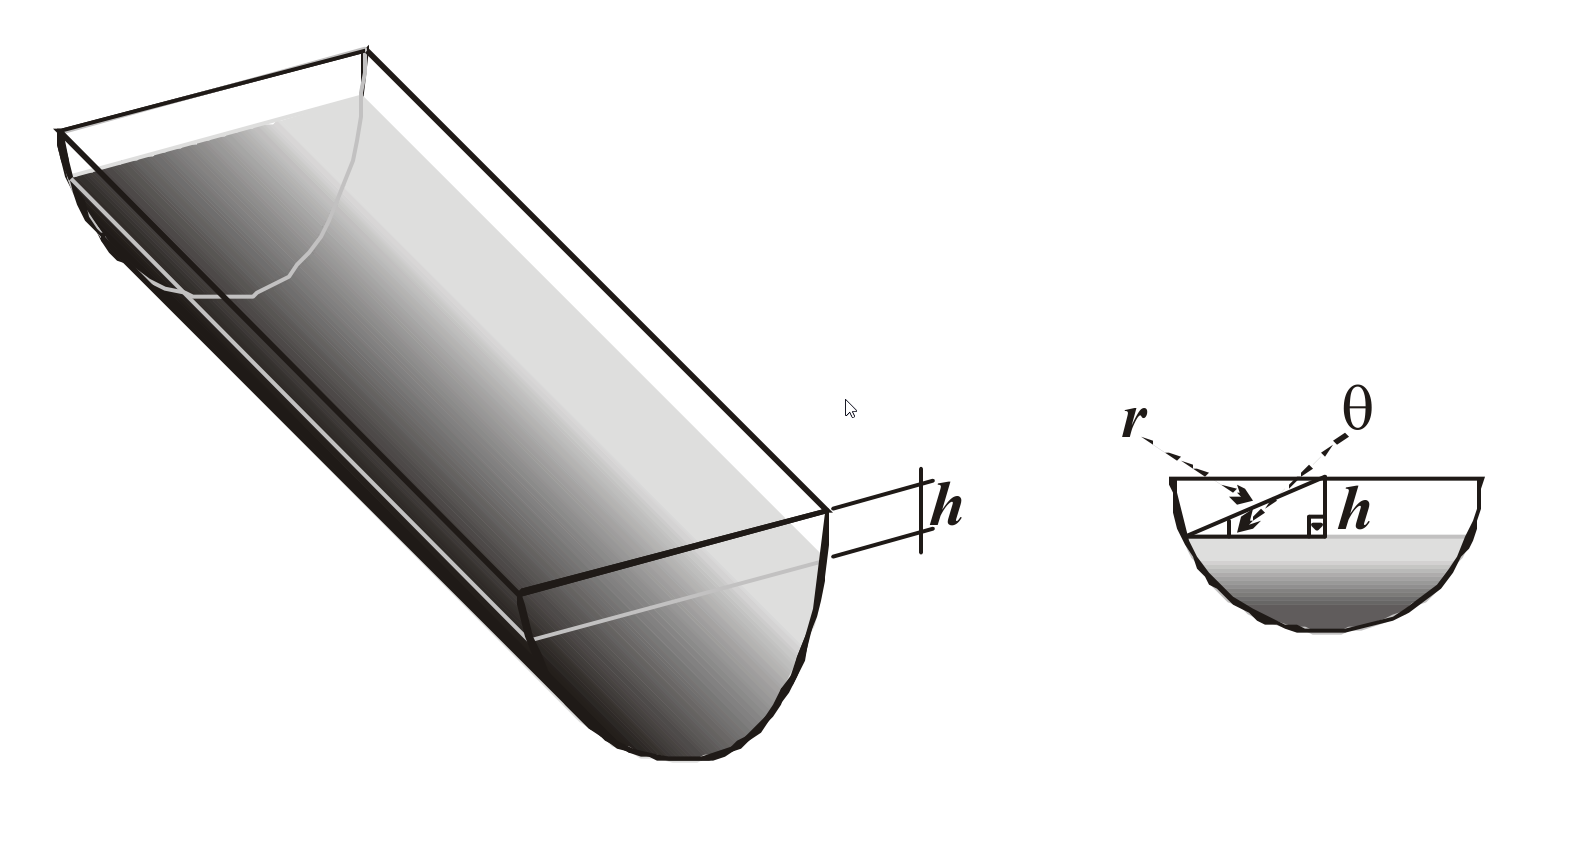

## Passos

1. Substituir valores das variáveis r, L e V.

$$ arcsin(h) + h \sqrt{1-h^2} + 1,24 - 0,5\pi = 0$$

In [1]:
import math
# 1. montar o nossa funcao

f = lambda h: math.asin(h) + h * math.sqrt(1 - h ** 2) + 1.24 - 0.5 * math.pi

# 2. descobrir os limites
#arcsin [-1, 1]

print(f'f(-1) = {f(-1)}\nf( 0) = {f(0)}\nf( 1) = {f(1)}')

f(-1) = -1.9015926535897931
f( 0) = -0.33079632679489657
f( 1) = 1.2400000000000002


# Agora, é Implementar os Métodos

In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from IPython.display import HTML
HTML('''<style>.CodeMirror{min-width:100% !important;}</style>''')
plt.rcParams['figure.dpi'] = 160

def plot_fun(func, results, datapoints=100):
    ex = np.vectorize(func)
    a,b = results[0][1], results[0][2]
    x = np.linspace(a,b,datapoints)
    y = ex(np.linspace(a,b,datapoints))
    

    for r in results:
        plt.plot(x,y)
        print(f'iteração {r[0]}: a = {r[1]}, b = {r[2]}, ponto médio = {r[3]}')
        plt.axvline(r[1], linewidth=1, color='r')  
        plt.axvline(r[2], linewidth=1, color='r')
        plt.axhline(0, linewidth=1, color='g')
        plt.plot(r[3],ex(r[3]),'ro')
        plt.grid()
        plt.show()

def bisection(f, interval, error=0.001, max_iter=25, plot=False, log=False):

  assert isinstance(interval, list)

  res = pd.DataFrame(columns=['It', 'a', 'b', 'm','erro','f(a)', 'f(b)', 'f(m)'])
  
  # valores iniciais
  a,b,m,it = interval[0], interval[1], 0.0, 0

  while (abs(b-a) > error) and (it < max_iter):
    it += 1
  
    m = (a + b) / 2
    
    fa, fb, fm, ba = f(a), f(b), f(m), abs(b-a)

    res = res.append({'It': it, 'a': a, 'b': b, 'm': m, \
      'erro': ba ,'f(a)': fa, 'f(b)': fb, 'f(m)': fm }, ignore_index=True)
    
    #testes
    if fm == 0: print(f"método bissecção - resultado exato para m = {m} em {it} iterações"); break
    
    elif fm*fa < 0: 
      b = m
    else: 
      a = m
  else:
    print(f"método bissecção - resultado final: {m} em {it} iterações")
    if log: print(res)
    if plot: pass
    return res

def false_pos(f, interval, error=0.001, max_iter=25, plot=False, log=False):

  assert isinstance(interval, list)

  res = pd.DataFrame(columns=['It', 'a', 'b', 'm','erro','f(a)', 'f(b)', 'f(m)'])

  a,b,m,it = interval[0], interval[1], 0.0, 0
  fm = 1000000.0
  while (min(abs(b-a),abs(fm)) > error) and (it < max_iter):
    it += 1

    fa, fb = f(a), f(b)

    m = (a * fb - b * fa) / (fb - fa)    

    fm, ba = f(m), abs(b-a)

    res = res.append({'It': it, 'a': a, 'b': b, 'm': m, \
      'erro': ba ,'f(a)': fa, 'f(b)': fb, 'f(m)': fm }, ignore_index=True)
     
    #print(f"it {it}\n a = {a} m = {m} b = {b}\nf(a) = {fa} f(m) = {fm} f(b) = {fb}")

    #testes
    if fm == 0:
      print(f"metodo falsa posição - resultado exato para m = {m} em {it} iterações"); break
    elif fm*fa < 0:
      a = m
    else:
      b = m
  else:
    print(f"método falsa posição - resultado final: {m} em {it} iterações")
    if log: print(res)
    if plot: pass
    return res

def secant(f, interval, error=0.001, max_iter=25, plot=False, log=False):

  assert isinstance(interval, list)

  res = pd.DataFrame(columns=['It', 'a', 'b', 'm','erro','f(a)', 'f(b)', 'f(m)'])

  a,b,m,it,failed = interval[0], interval[1], 0.0, 0, False
  fm = 1000000.0

  while (min(abs(b-a),abs(fm)) > error) and (it < max_iter) and (not failed):
    it += 1

    fa, fb = f(a), f(b)

    if fa * fb >= 0: 
      failed = True

    m = a - fa * ((b-a)/(fb-fa))

    fm, ba = f(m), abs(b-a)

    res = res.append({'It': it, 'a': a, 'b': b, 'm': m, \
      'erro': ba ,'f(a)': fa, 'f(b)': fb, 'f(m)': fm }, ignore_index=True)
     
    #print(f"it {it}\n a = {a} m = {m} b = {b}\nf(a) = {fa} f(m) = {fm} f(b) = {fb}")

    #testes
    if fm == 0:
      print(f"metodo secante - resultado exato para m = {m} em {it} iterações"); break;
    elif fm*fa < 0:
      b = m
    else:
      a = m
  else:
    if failed:
      print(f"método secante falhou em {it} iterações")
    else:
      print(f"método secante - resultado final: {m} em {it} iterações")
      if log: print(res)
      if plot: pass
      return res

def multitest(func, interval, error=0.001, max_iter=200, log=False):
  a = bisection(func,interval,error=error, max_iter=max_iter, log=log)
  b = false_pos(func,interval,error=error, max_iter=max_iter, log=log)
  c = secant(func,interval,error=error, max_iter=max_iter, log=log)
  print('\n')
  return a,b,c

  c = secant(func,interval,error=error, max_iter=max_iter, log=log)
  print('\n')
  return a,b,c


In [27]:
#Executando os Testes no Intervalo [0,1], com erro 0.001
a, b, c = multitest(f, [0,1],error=0.001)

método bissecção - resultado final: 0.1669921875 em 10 iterações
método falsa posição - resultado final: 0.1659949698628831 em 6 iterações
método secante - resultado final: 0.166638189560007 em 2 iterações




In [29]:
#print(f"MÉTODO DA BISSECÇÃO\n{a}\n MÉTODO DA FALSA POSIÇÃO\n{b}\nMÉTODO DA SECANTE\n{c}")
a

,It,a,b,m,erro,f(a),f(b),f(m)
0,1.0,0.000000,1.000000,0.500000,1.000000,-0.330796,1.240000,0.625815
1,2.0,0.000000,0.500000,0.250000,0.500000,-0.330796,0.625815,0.163945
2,3.0,0.000000,0.250000,0.125000,0.250000,-0.330796,0.163945,-0.081449
3,4.0,0.125000,0.250000,0.187500,0.125000,-0.081449,0.163945,0.041995
4,5.0,0.125000,0.187500,0.156250,0.062500,-0.081449,0.041995,-0.019573
5,6.0,0.156250,0.187500,0.171875,0.031250,-0.019573,0.041995,0.011254
6,7.0,0.156250,0.171875,0.164062,0.015625,-0.019573,0.011254,-0.004149
7,8.0,0.164062,0.171875,0.167969,0.007812,-0.004149,0.011254,0.003555
8,9.0,0.164062,0.167969,0.166016,0.003906,-0.004149,0.003555,-0.000297
9,10.0,0.166016,0.167969,0.166992,0.001953,-0.000297,0.003555,0.001629


iteração 1.0: a = 0.0, b = 1.0, ponto médio = 0.21059148226419908


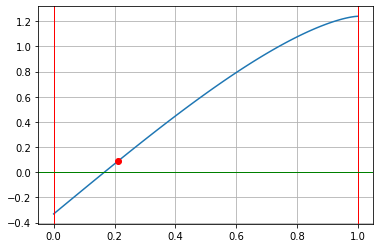

iteração 2.0: a = 0.0, b = 0.21059148226419908, ponto médio = 0.166638189560007


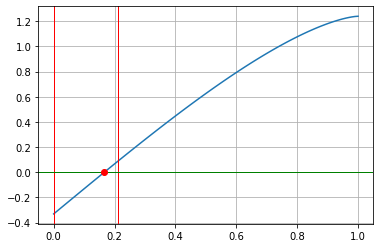

In [31]:
plot_fun(f, c.to_numpy())


Assim,a profundidade r - h da água da água solicitada é
aproximadamente $$ 1-(0,1640625) ft$$


In [35]:
# marivaldo 2.1, res -1,4414
#a1, b1, c1 = multitest(lambda x: x ** 3 - math.sin(x) + 2, [-2,-1],error=0.01)
#plot_fun(lambda x: x ** 3 - math.sin(x) + 2, [-2,-1], a1.to_numpy())

# marivaldo 2.2 , mais complicado, resultado. 0.606569
#multitest(lambda x: math.atan(x) - math.e ** (-x), [0,1], error=1e-4)

#do livro marivaldo, resultado tem que ser 1,32814

#multitest(lambda x: x**3 + 2*x + - 5, [0,2], error=0.001)

# Método de Newton

In [16]:
import sympy
h = sym.Symbol('h')
v = sym.asin(h) + h * sym.sqrt(1 - h ** 2) + 1.24 - 0.5 * sym.pi
v

h*sqrt(1 - h**2) + asin(h) - 0.5*pi + 1.24

In [19]:
sym.diff(v,h)

-h**2/sqrt(1 - h**2) + sqrt(1 - h**2) + 1/sqrt(1 - h**2)

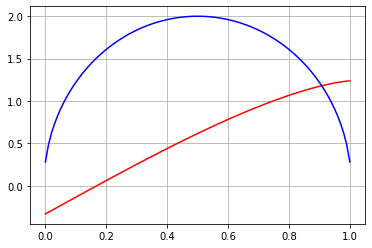

In [20]:
v = lambda h: math.asin(h) + h * math.sqrt(1 - h ** 2) + 1.24 - 0.5 * math.pi
v_dx = lambda h: -h**2/ math.sqrt(1 - h**2) + math.sqrt(1 - h**2) + 1/ math.sqrt(1 - h**2)

ex, ex_dx = np.vectorize(v), np.vectorize(v_dx)
x = np.linspace(0,1,100)
y1,y2 = ex(np.linspace(0,0.99,100)), ex_dx(np.linspace(-0.99,0.99,100))

plt.plot(x,y1,color='r')
plt.plot(x,y2,color='b')
plt.grid()

In [21]:
def newton(f, df, x0, error=0.001, max_iter=50):

    res = pd.DataFrame(columns=['it','x','f(x)'])

    it = 0
    x = x0
    while (abs(f(x)) > error and it <= max_iter):
        res = res.append({'it': it, 'x': x, 'f(x)':f(x) }, ignore_index=True)
        x -= f(x)/df(x)
        it += 1      
    
    print(f"resultado {x} em {it} iterações")
    return res

In [22]:
res = newton(v, v_dx, 0, error=0.001)
print(res)

resultado 0.16616598444557845 em 2 iterações
    it         x      f(x)
0  0.0  0.000000 -0.330796
1  1.0  0.165398 -0.001514


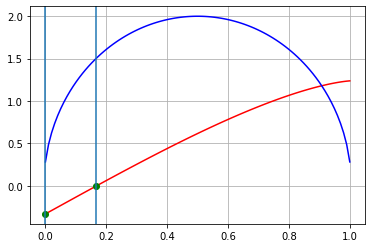

In [23]:
plt.plot(x,y1,color='r')
plt.plot(x,y2,color='b')
for r in res.to_numpy():
    plt.plot(r[1],ex(r[1]),'go')
    plt.axvline(r[1])

plt.grid()

In [25]:
erro1 = 1e-308
newton(v, v_dx, 0, error=erro1)
a, b, c = multitest(f, [0,1],error=erro1)

resultado 0.16616603465836816 em 4 iterações
método bissecção - resultado exato para m = 0.1661660346583682 em 50 iterações
metodo falsa posição - resultado exato para m = 0.16616603465836813 em 32 iterações
metodo secante - resultado exato para m = 0.16616603465836816 em 9 iterações




# FIM.
Dúvidas?